<a href="https://colab.research.google.com/github/DIFACQUIM/Cursos/blob/main/08_Similitud_funciones_y_visualizacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Tabla de Contenido***
La mayoría de los puntos en este script se emplearon en el estudio de librerias quimioenfocadas.
- [0 - ***Importar librerias***](#0)
- [1 - ***Gráfico de %Identidad*** ](#1)
- [2 - ***Referencias*** ](#2)

<a name='0'></a>
# **Librerias: instalar e importar**

In [2]:
from IPython.utils import io
import tqdm.notebook
import os, sys, random

total = 100

with tqdm.notebook.tqdm(total=total) as pbar:
    with io.capture_output() as captured:
        from platform import python_version
        #if python_version() < "3.7":
        #    !pip install https://github.com/biotite-dev/biotite/archive/master.tar.gz
        pbar.update(20)

        #Librerias gráficas
        !pip install matplotlib
        import matplotlib.pyplot as plt
        %matplotlib inline

        !pip install seaborn
        import seaborn as sns
        pbar.update(40)

        #Librerias del sistema y herramientas primarias:
        import os.path
        import os
        import subprocess
        import pandas as pd

        import matplotlib.font_manager as font_manager

        !pip install cufflinks
        import cufflinks as cf
        import warnings
        warnings.filterwarnings("ignore")
        %config Completer.use_jedi = False
        pbar.update(30)

        #Busqueda
        !pip install rdkit
        from rdkit import Chem, DataStructs
        from rdkit.Chem import AllChem, Draw, PandasTools, Descriptors, Descriptors3D, rdMolDescriptors, Scaffolds
        from rdkit.Chem.Scaffolds.MurckoScaffold import GetScaffoldForMol
        PandasTools.RenderImagesInAllDataFrames(images=True) #Para visualizar moléculas

        from rdkit.Chem.Draw import IPythonConsole

        !pip install chembl_webresource_client
        import math
        from math import pi

        from pathlib import Path
        from zipfile import ZipFile
        from tempfile import TemporaryDirectory

        !pip install numpy
        import numpy as np
        !pip install simplejson
        import simplejson as json

        from chembl_webresource_client.new_client import new_client
        from tqdm.auto import tqdm

        # Mount Google Drive and upload your PyMOL license
        from google.colab import drive
        drive.mount("/content/drive")
        pbar.update(10)

  0%|          | 0/100 [00:00<?, ?it/s]

<a name='1'></a>
# **Gráfico de %Identidad**

In [9]:
url="https://raw.githubusercontent.com/DIFACQUIM/Cursos/main/Datasets//08_Similitud_compounds_g9a.csv"
id=pd.read_csv(url,index_col=[0])
id.head()

,molecule_chembl_id,smiles,IC50,std_units,pIC50,molecular_species,heavy_atoms,full_mwt,hbd,hba,psa,rtb,alogp,num_ro5_violations,max_phase,document_chembl_id
0,CHEMBL4170225,COc1cc2c(NC3CCN(C)CC3)cc(-c3ccc(C)[nH]3)nc2cc1...,"0,5",nM,"9,301029996",BASE,35.0,477.65,2.0,6.0,65.65,9.0,4.92,0.0,NaN,CHEMBL4130634
1,CHEMBL4162206,COc1cc2c(NC3CCN(C(C)C)CC3)cc(C3CCCCC3)nc2cc1OC...,"0,7",nM,"9,15490196",BASE,37.0,508.75,1.0,6.0,49.86,10.0,6.44,2.0,NaN,CHEMBL4130634
2,CHEMBL3109639,COc1cc2c(cc1OCCCN1CCCC1)N=C(N)C2(C)C,"0,9",nM,"9,045757491",BASE,23.0,317.43,1.0,5.0,60.08,6.0,2.84,0.0,NaN,CHEMBL3108684
3,CHEMBL3109631,COc1cc2c(cc1OCC1CCN(C)C1)N=C(N)C21CCC1,1,nM,9,BASE,23.0,315.42,1.0,5.0,60.08,4.0,2.45,0.0,NaN,CHEMBL3108684
4,CHEMBL5187766,COc1cc2c(NCCN)ccnc2cc1OCCCN1CCCC1,"1,6",nM,"8,795880017",BASE,25.0,344.46,2.0,6.0,72.64,9.0,2.48,0.0,NaN,CHEMBL5113445


In [10]:
id.sort_values(by=["document_chembl_id"], ascending=False, inplace=True)
# Reset index
id.reset_index(drop=True, inplace=True)
print(id.shape)
id.head(1)

(436, 16)


,molecule_chembl_id,smiles,IC50,std_units,pIC50,molecular_species,heavy_atoms,full_mwt,hbd,hba,psa,rtb,alogp,num_ro5_violations,max_phase,document_chembl_id
0,CHEMBL5197586,Nc1ncnc2c1ncn2[C@H]1O[C@@H](CN(CCI)CCC[C@H](N)...,1800,nM,"5,744727495",ZWITTERION,30.0,535.34,5.0,11.0,185.87,10.0,-1.04,2.0,NaN,CHEMBL5136992


In [11]:
def tanimoto_calc(smi1, smi2):
    mol1 = Chem.MolFromSmiles(smi1)
    mol2 = Chem.MolFromSmiles(smi2)
    fp1 = AllChem.GetMorganFingerprintAsBitVect(mol1, 3, nBits=2048)
    fp2 = AllChem.GetMorganFingerprintAsBitVect(mol2, 3, nBits=2048)
    s = round(DataStructs.TanimotoSimilarity(fp1,fp2),3)
    return s

In [12]:
import time
tic =time.time()
hmap=pd.DataFrame()
for i in id.index:
    for j in id.index:
        a=id.loc[i].at['smiles']
        b=id.loc[j].at['smiles']
        alignment= tanimoto_calc(a,b)
        hmap.loc[id.loc[i,'molecule_chembl_id'],id.loc[j,'molecule_chembl_id']]=alignment
toc =time.time()
print("Time: "+ str((toc-tic))+" s")
#Matriz de 414x414, con tiempo de ejecución aproximado de: 5 min

Time: 329.10913038253784 s


In [13]:
#hmap.to_excel('8_compound_aligment.xlsx')
hmap

,CHEMBL5197586,CHEMBL5172325,CHEMBL5189737,CHEMBL5191615,CHEMBL5170450,CHEMBL5188089,CHEMBL5183771,CHEMBL5207069,CHEMBL5172085,CHEMBL5199280,...,CHEMBL576781,CHEMBL578227,CHEMBL572373,CHEMBL585180,CHEMBL568964,CHEMBL571717,CHEMBL569864,CHEMBL570799,CHEMBL571951,CHEMBL570120
CHEMBL5197586,1.000,0.567,0.090,0.082,0.089,0.101,0.062,0.087,0.085,0.100,...,0.071,0.042,0.036,0.060,0.043,0.043,0.065,0.044,0.047,0.036
CHEMBL5172325,0.567,1.000,0.087,0.079,0.086,0.089,0.058,0.084,0.081,0.098,...,0.046,0.037,0.039,0.063,0.038,0.046,0.054,0.039,0.050,0.038
CHEMBL5189737,0.090,0.087,1.000,0.560,0.802,0.369,0.344,0.429,0.414,0.390,...,0.294,0.223,0.226,0.246,0.220,0.220,0.232,0.206,0.239,0.242
CHEMBL5191615,0.082,0.079,0.560,1.000,0.649,0.366,0.331,0.388,0.375,0.375,...,0.372,0.301,0.308,0.319,0.289,0.300,0.304,0.234,0.327,0.325
CHEMBL5170450,0.089,0.086,0.802,0.649,1.000,0.363,0.350,0.434,0.419,0.395,...,0.299,0.229,0.232,0.232,0.227,0.217,0.238,0.213,0.235,0.238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CHEMBL571717,0.043,0.046,0.220,0.300,0.217,0.165,0.168,0.174,0.168,0.178,...,0.541,0.718,0.789,0.549,0.625,1.000,0.531,0.443,0.600,0.767
CHEMBL569864,0.065,0.054,0.232,0.304,0.238,0.185,0.205,0.202,0.195,0.205,...,0.583,0.730,0.615,0.400,0.724,0.531,1.000,0.547,0.429,0.568
CHEMBL570799,0.044,0.039,0.206,0.234,0.213,0.192,0.183,0.189,0.183,0.183,...,0.495,0.658,0.531,0.319,0.693,0.443,0.547,1.000,0.345,0.482
CHEMBL571951,0.047,0.050,0.239,0.327,0.235,0.182,0.183,0.190,0.183,0.183,...,0.439,0.570,0.625,0.625,0.481,0.600,0.429,0.345,1.000,0.608


In [14]:
palette= sns.blend_palette(['lightpink', 'purple'],74)
palette

[(1.0, 0.7137254901960784, 0.7568627450980392),
 (0.9941407151095732, 0.7053287197231835, 0.7538638985005767),
 (0.9863283352556709, 0.6941330257593233, 0.7498654363706266),
 (0.9804690503652441, 0.6857362552864283, 0.7468665897731641),
 (0.9726566705113417, 0.6745405613225682, 0.7428681276432141),
 (0.966797385620915, 0.6661437908496732, 0.7398692810457516),
 (0.9589850057670127, 0.6549480968858131, 0.7358708189158016),
 (0.953125720876586, 0.6465513264129181, 0.7328719723183391),
 (0.9453133410226836, 0.6353556324490581, 0.7288735101883891),
 (0.9394540561322569, 0.626958861976163, 0.7258746635909266),
 (0.9316416762783545, 0.615763168012303, 0.7218762014609765),
 (0.9257823913879277, 0.6073663975394079, 0.718877354863514),
 (0.9179700115340254, 0.5961707035755479, 0.714878892733564),
 (0.9121107266435986, 0.5877739331026528, 0.7118800461361015),
 (0.9042983467896963, 0.5765782391387928, 0.7078815840061514),
 (0.8984390618992695, 0.5681814686658977, 0.7048827374086889),
 (0.8906266820453672, 0.5569857747020377, 0.700884275278739),
 (0.8847673971549403, 0.5485890042291426, 0.6978854286812765),
 (0.8769550173010381, 0.5373933102652826, 0.6938869665513264),
 (0.8710957324106113, 0.5289965397923876, 0.6908881199538639),
 (0.863283352556709, 0.5178008458285275, 0.6868896578239139),
 (0.8574240676662822, 0.5094040753556325, 0.6838908112264513),
 (0.8496116878123798, 0.4982083813917724, 0.6798923490965013),
 (0.8437524029219531, 0.48981161091887737, 0.6768935024990388),
 (0.8359400230680507, 0.4786159169550173, 0.6728950403690888),
 (0.830080738177624, 0.47021914648212226, 0.6698961937716262),
 (0.8222683583237216, 0.4590234525182622, 0.6658977316416763),
 (0.8164090734332949, 0.45062668204536716, 0.6628988850442137),
 (0.8085966935793926, 0.43943098808150716, 0.6589004229142638),
 (0.8027374086889658, 0.4310342176086121, 0.6559015763168012),
 (0.7949250288350634, 0.41983852364475205, 0.6519031141868512),
 (0.7890657439446367, 0.411441753171857, 0.6489042675893887),
 (0.7812533640907343, 0.40024605920799694, 0.6449058054594387),
 (0.7753940792003076, 0.3918492887351019, 0.6419069588619761),
 (0.7675816993464052, 0.38065359477124183, 0.6379084967320261),
 (0.7617224144559784, 0.37225682429834683, 0.6349096501345636),
 (0.7539100346020762, 0.3610611303344867, 0.6309111880046137),
 (0.7480507497116493, 0.3526643598615917, 0.627912341407151),
 (0.740238369857747, 0.3414686658977316, 0.623913879277201),
 (0.7343790849673202, 0.3330718954248366, 0.6209150326797386),
 (0.7265667051134179, 0.3218762014609765, 0.6169165705497885),
 (0.7207074202229912, 0.3134794309880815, 0.613917723952326),
 (0.7128950403690888, 0.3022837370242215, 0.609919261822376),
 (0.707035755478662, 0.2938869665513264, 0.6069204152249135),
 (0.6992233756247597, 0.2826912725874664, 0.6029219530949634),
 (0.6933640907343329, 0.2742945021145713, 0.5999231064975009),
 (0.6855517108804305, 0.2630988081507113, 0.595924644367551),
 (0.6796924259900039, 0.2547020376778163, 0.5929257977700885),
 (0.6718800461361014, 0.24350634371395619, 0.5889273356401384),
 (0.6660207612456748, 0.2351095732410612, 0.5859284890426759),
 (0.6582083813917724, 0.22391387927720108, 0.5819300269127259),
 (0.6523490965013456, 0.21551710880430608, 0.5789311803152634),
 (0.6445367166474433, 0.20432141484044597, 0.5749327181853133),
 (0.6386774317570165, 0.19592464436755097, 0.5719338715878508),
 (0.6308650519031141, 0.18472895040369086, 0.5679354094579008),
 (0.6250057670126874, 0.17633217993079586, 0.5649365628604383),
 (0.6171933871587851, 0.16513648596693586, 0.5609381007304883),
 (0.6113341022683583, 0.15673971549404075, 0.5579392541330257),
 (0.603521722414456, 0.14554402153018076, 0.5539407920030758),
 (0.5976624375240291, 0.13714725105728565, 0.5509419454056133),
 (0.5898500576701269, 0.12595155709342565, 0.5469434832756632),
 (0.5839907727797, 0.11755478662053054, 0.5439446366782007),
 (0.5761783929257978, 0.10635909265667054, 0.5399461745482507),
 (0.570319108035371, 0.09796232218377543, 0.5

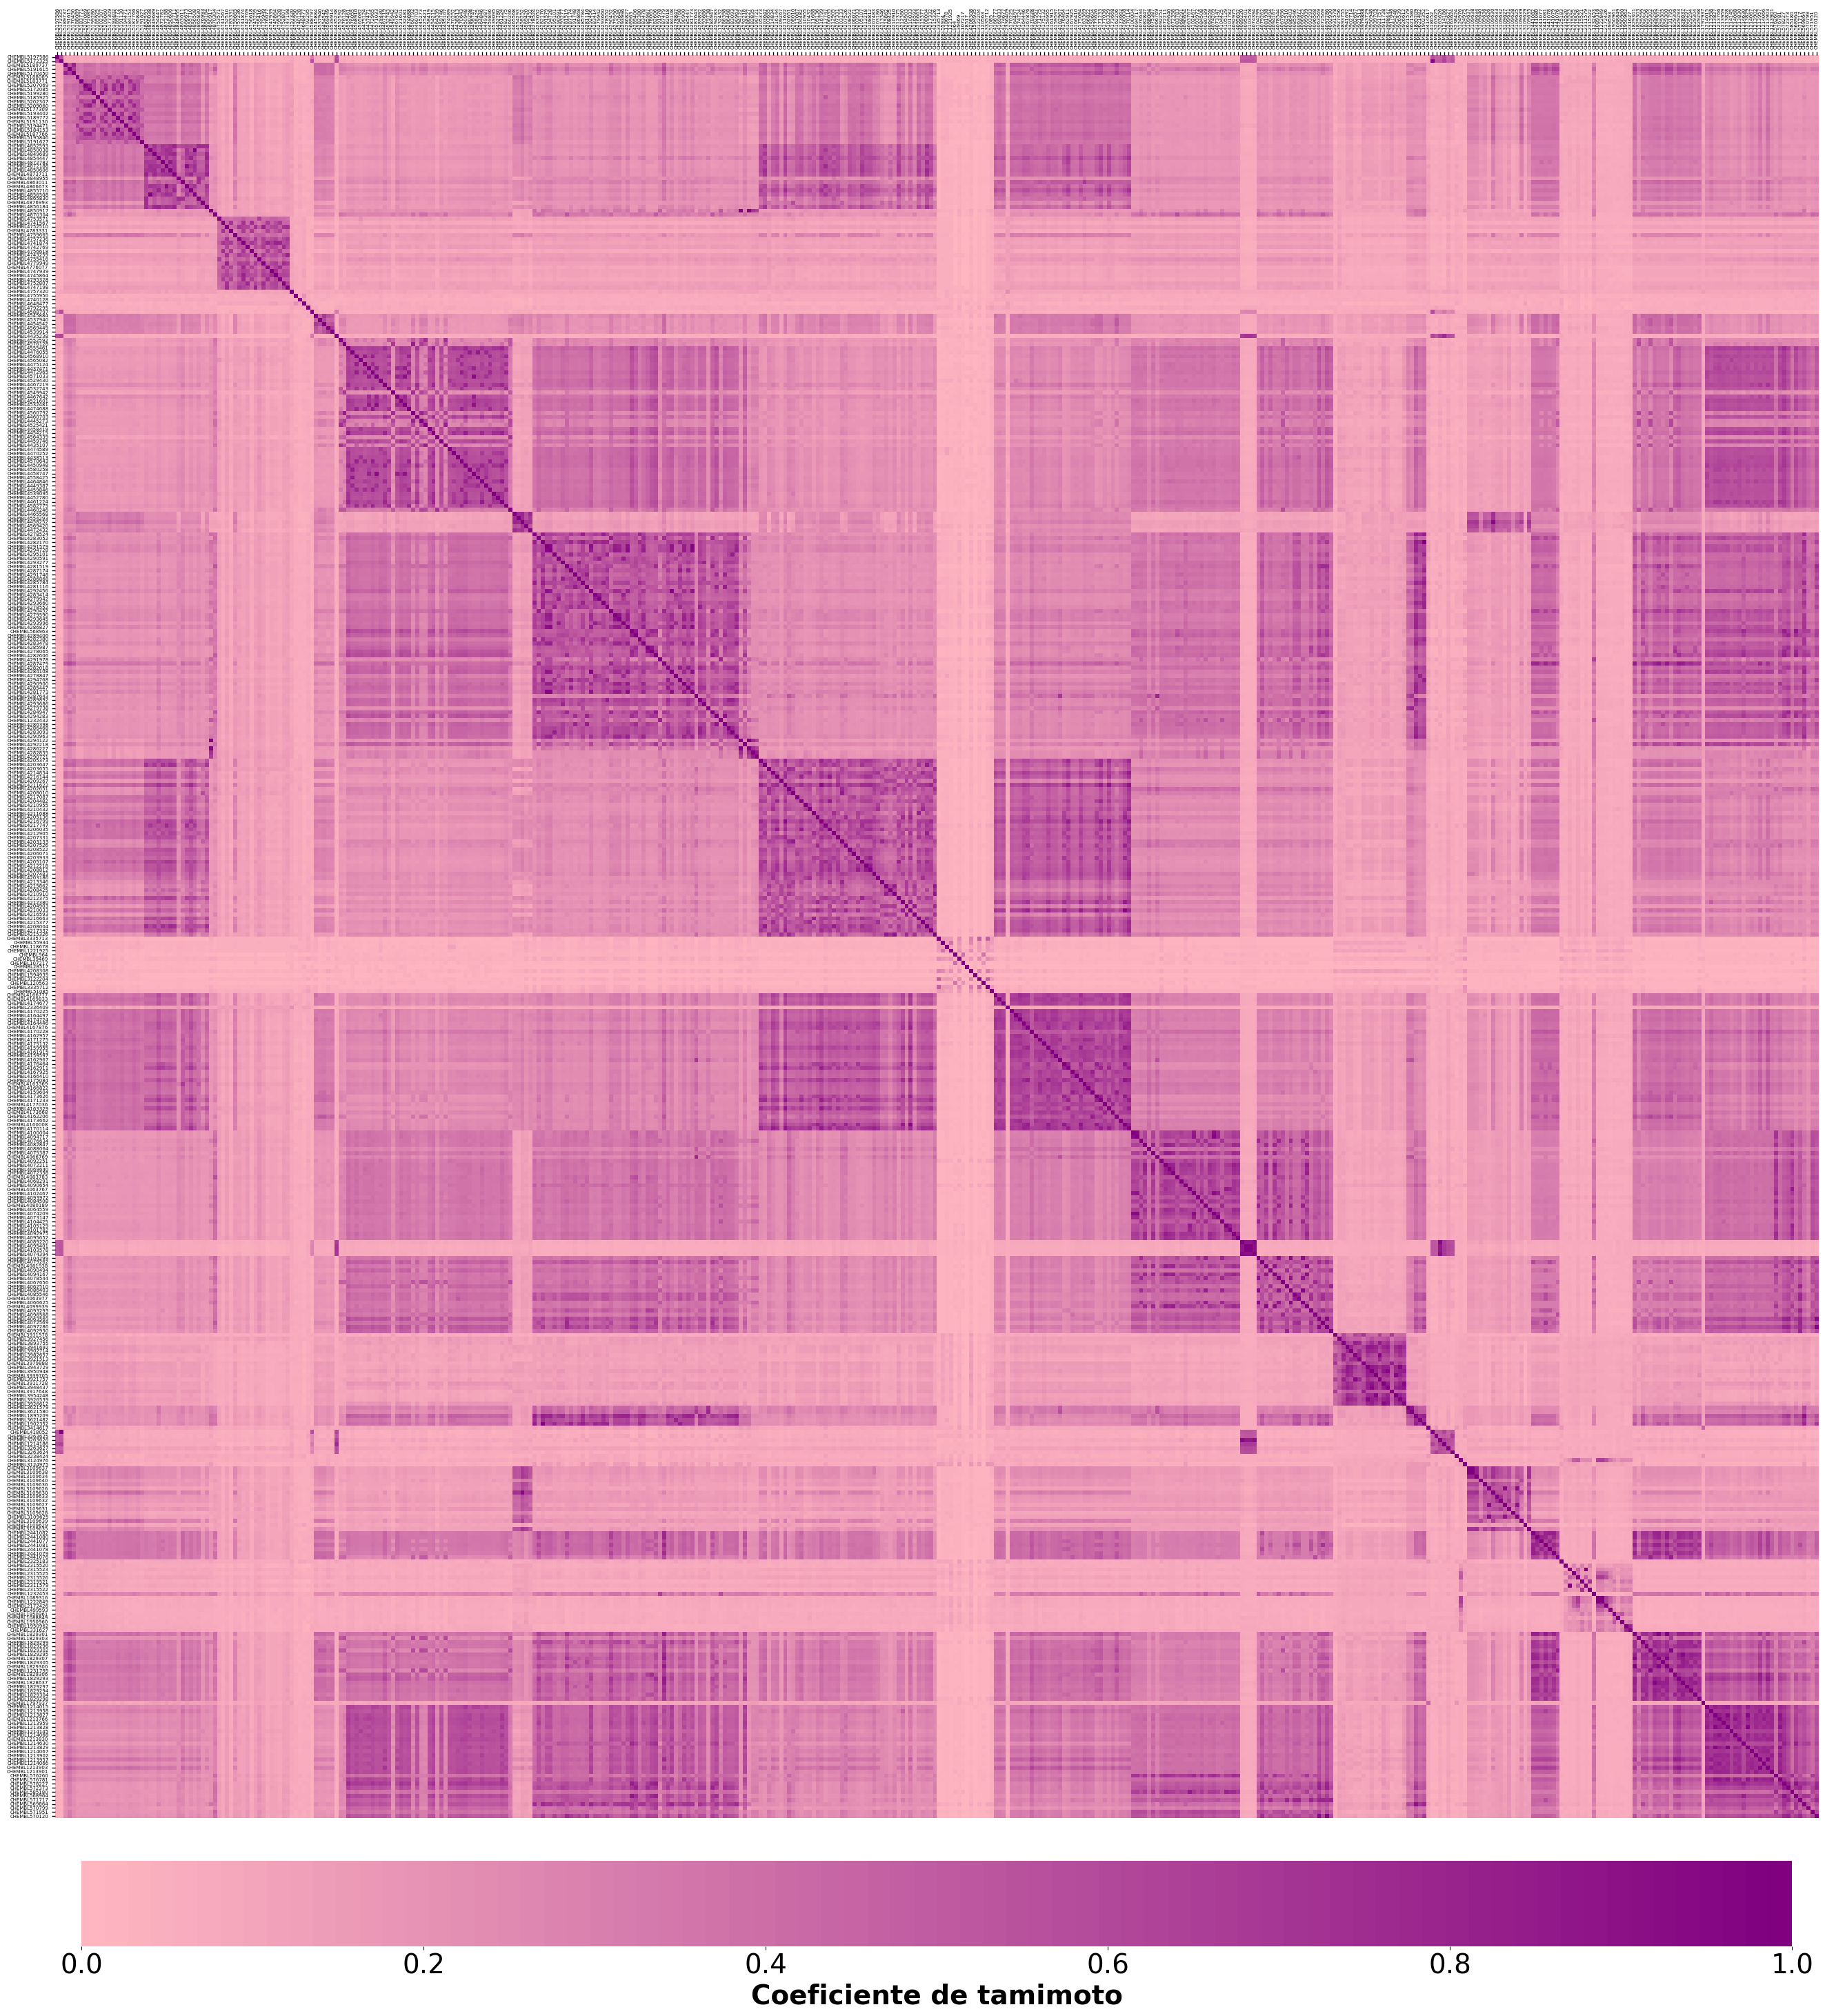

In [15]:
fig, ax = plt.subplots(figsize=(40,40))
sns.heatmap(hmap,square = True, xticklabels=hmap.columns, yticklabels=hmap.index, cmap=palette, vmin=0, vmax=1,
            cbar_kws={'shrink':0.8,
                      'orientation':'horizontal','spacing':'uniform',
                      'pad':0.02})
ax.figure.axes[1].tick_params(axis="x", labelsize=28) #Tamaño de ticks en cbar
ax.figure.axes[1].set_xlabel('Coeficiente de tamimoto', size=28, weight='bold') #Etiqueta de cbar
ax.tick_params(labelsize=28)
plt.xticks (np.arange(len(hmap.index))+0.5, hmap.index,rotation=90)
plt.yticks (np.arange(len(hmap.columns))+0.5, hmap.columns, rotation=0)
ax.xaxis.tick_top()
plt.tick_params ('both',width=1,labelsize=5)
plt.savefig('Coeficiente_tanimoto.png',dpi=300,format='png',transparent=False)
plt.show()

<a name='2'></a>
# **Referencias:**

1.   https://projects.volkamerlab.org/teachopencadd/talktorials/T001_query_chembl.html
2.   https://gist.github.com/leelasd/746f3c447805fc6ea5aad1071bd77aef

*   https://github.com/rdkit/UGM_2014/blob/master/Notebooks/Scaffold%20analysis%20of%20ChEMBL%20data%20with%20pandas%20and%20RDKit/Scaffold%20analysis%20of%20ChEMBL%20data%20with%20pandas%20and%20RDKit%20-%20RDKit%20UGM2014.ipynb
*   https://github.com/rdkit/UGM_2013/blob/master/Tutorials/pandastools/Pandas_RDKit_UGM.ipynb
*https://github.com/rdkit/UGM_2013/blob/master/Tutorials/pandastools/Pandas_RDKit_UGM.ipynb

